In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
heart=pd.read_csv('D:\\greatlearning\\practice test\\Logistic_Regresssion\\datasets_4123_6408_framingham.csv')
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [64]:
heart=heart.rename(columns={'male':'Gendre'})
heart.head()

,Gendre,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [65]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
Gendre             4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [66]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Gendre,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


In [67]:
heart.isnull().sum()

Gendre               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [68]:
heart.shape

(4240, 16)

In [69]:
heart['education']=heart['education'].fillna(heart['education'].mean())
heart['cigsPerDay']=heart['cigsPerDay'].fillna(heart['cigsPerDay'].mean())
heart['BPMeds']=heart['BPMeds'].fillna(heart['BPMeds'].mean())
heart['totChol']=heart['totChol'].fillna(heart['totChol'].mean())
heart['BMI']=heart['BMI'].fillna(heart['BMI'].mean())
heart['heartRate']=heart['heartRate'].fillna(heart['heartRate'].mean())
heart['glucose']=heart['glucose'].fillna(heart['glucose'].mean())

In [70]:
heart.isnull().sum()

Gendre             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [71]:
heart['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

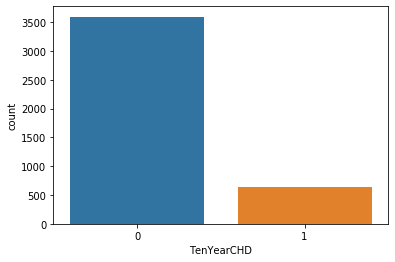

In [72]:
sns.countplot(heart['TenYearCHD'])

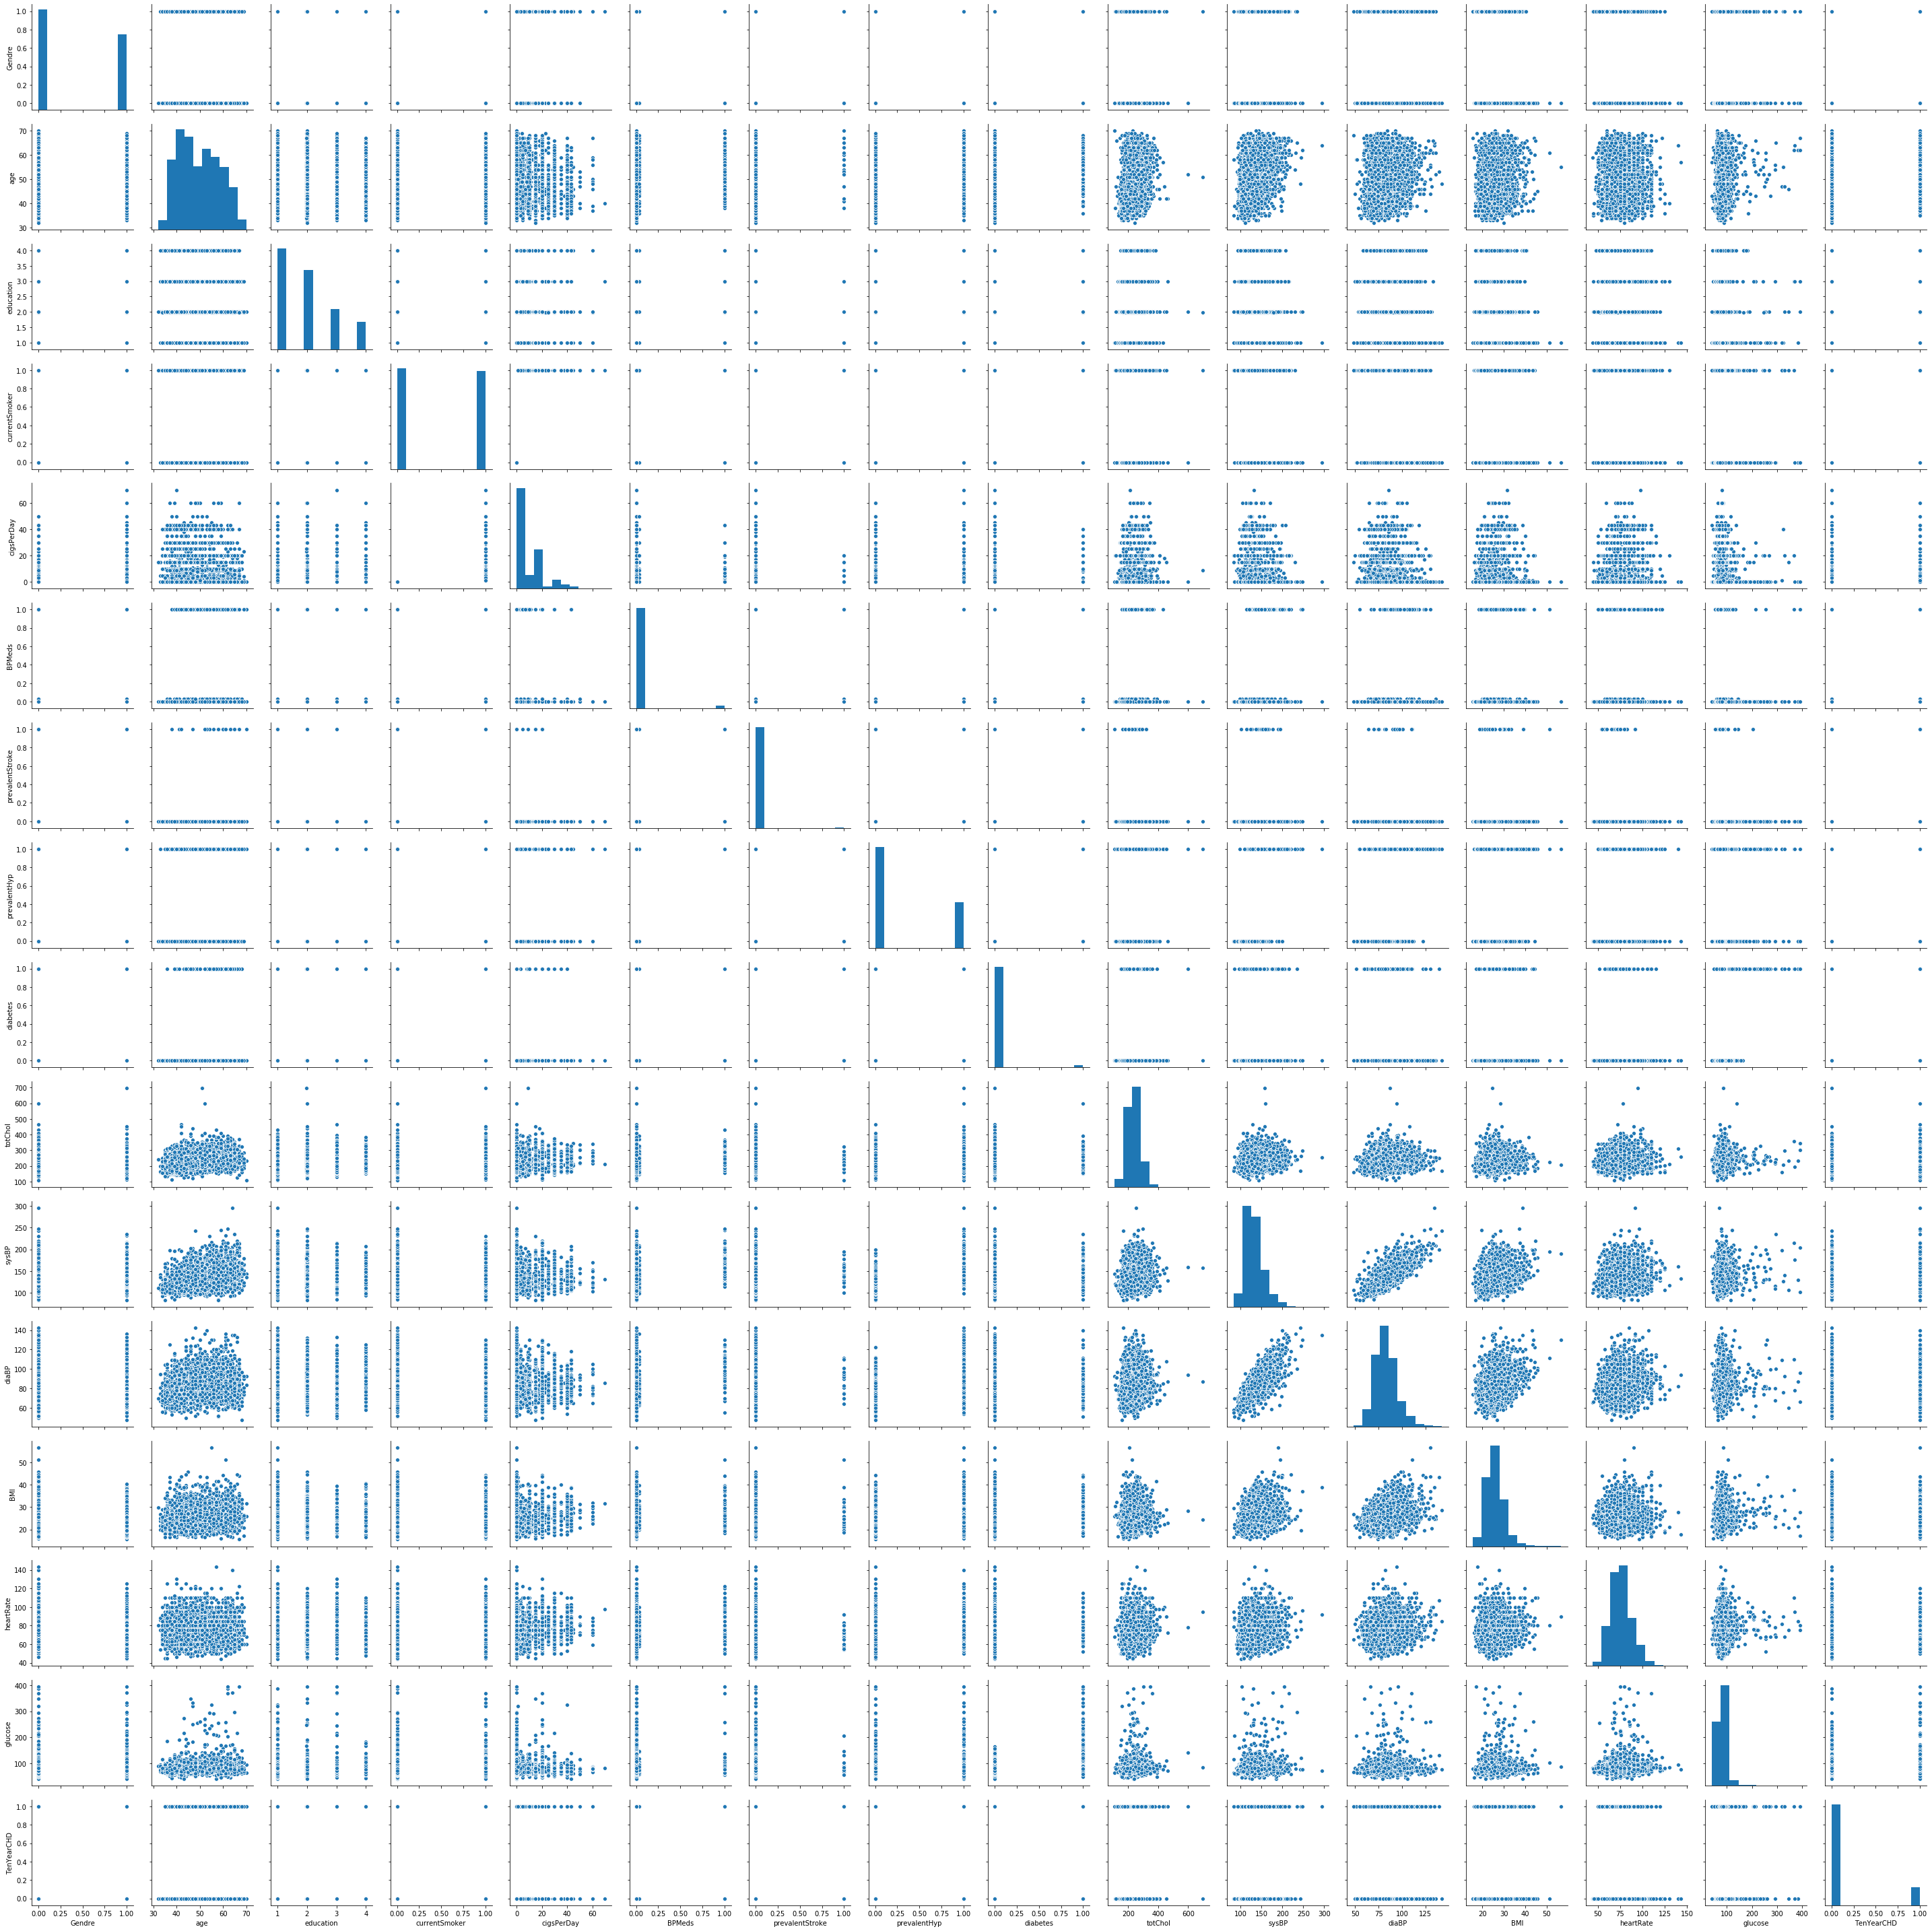

In [73]:
sns.pairplot(heart)

In [74]:
corr=heart.corr()
corr

,Gendre,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Gendre,1.000000,-0.029014,0.017188,0.197026,0.316023,-0.052203,-0.004550,0.005853,0.015693,-0.070064,-0.035879,0.058199,0.081705,-0.116913,0.005718,0.088374
age,-0.029014,1.000000,-0.164081,-0.213662,-0.192534,0.122036,0.057679,0.306799,0.101314,0.260691,0.394053,0.205586,0.135578,-0.012839,0.116951,0.225408
education,0.017188,-0.164081,1.000000,0.018297,0.008197,-0.010689,-0.035139,-0.080753,-0.038214,-0.022993,-0.128126,-0.061362,-0.135876,-0.053603,-0.033837,-0.053571
currentSmoker,0.197026,-0.213662,0.018297,1.000000,0.767055,-0.048621,-0.032980,-0.103710,-0.044285,-0.046211,-0.130281,-0.107933,-0.167483,0.062678,-0.054062,0.019448
cigsPerDay,0.316023,-0.192534,0.008197,0.767055,1.000000,-0.045847,-0.032711,-0.066444,-0.037086,-0.026182,-0.088523,-0.056473,-0.092888,0.075257,-0.056020,0.057646
BPMeds,-0.052203,0.122036,-0.010689,-0.048621,-0.045847,1.000000,0.115008,0.259125,0.051584,0.078973,0.252023,0.192387,0.099586,0.015172,0.048925,0.086805
prevalentStroke,-0.004550,0.057679,-0.035139,-0.032980,-0.032711,0.115008,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.024856,-0.017674,0.018065,0.061823
prevalentHyp,0.005853,0.306799,-0.080753,-0.103710,-0.066444,0.259125,0.074791,1.000000,0.077752,0.162683,0.696656,0.615840,0.300599,0.146777,0.082757,0.177458
diabetes,0.015693,0.101314,-0.038214,-0.044285,-0.037086,0.051584,0.006955,0.077752,1.000000,0.040161,0.111265,0.050260,0.086282,0.048986,0.605709,0.097344
totChol,-0.070064,0.260691,-0.022993,-0.046211,-0.026182,0.078973,0.000105,0.162683,0.040161,1.000000,0.207436,0.163423,0.115013,0.090678,0.044710,0.081807


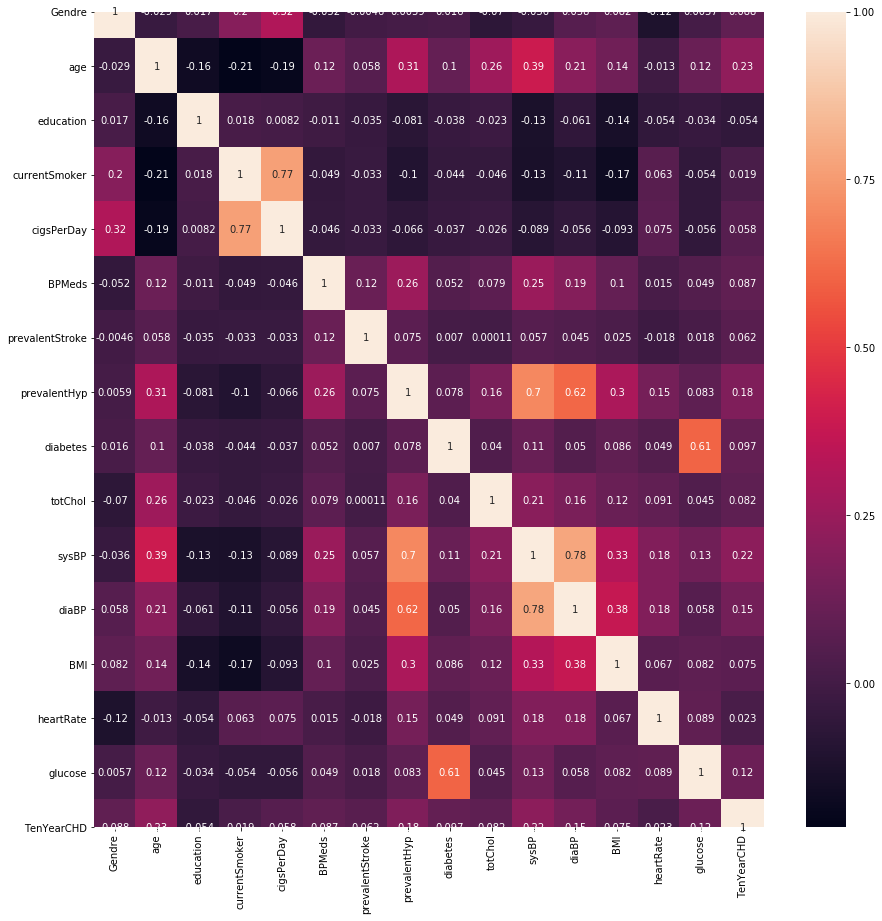

In [75]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X=heart.iloc[:,0:-1]
Y=heart['TenYearCHD']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=21)

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
model_log=LogisticRegression()
model_log.fit(X_train,Y_train)

C:\vaishali\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
model_log.score(X_test,Y_test)

0.8514150943396226

In [81]:
from sklearn import metrics

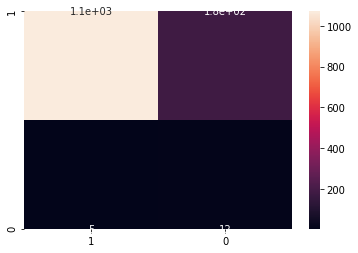

In [82]:
y_pred=model_log.predict(X_test)
df=metrics.confusion_matrix(y_pred,Y_test)
mat=pd.DataFrame(df,columns=[1,0],index=[1,0])
sns.heatmap(mat,annot=True)

In [83]:
metrics.accuracy_score(y_pred,Y_test)

0.8514150943396226

In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [85]:
logit_roc_auc=roc_auc_score(Y_test,y_pred)
logit_roc_auc

0.5282888248236098

In [86]:
fpr, tpr, thresholds=roc_curve(Y_test,model_log.predict_proba(X_test)[:,1])

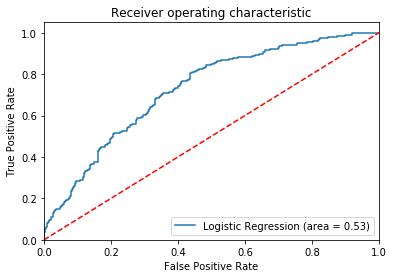

In [87]:
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()